In [1]:
import os
import ROOT

Welcome to JupyROOT 6.28/04


In [30]:
ERA = "2017"
HLTPATH = "MeasFakeEl23"

In [31]:
trigpathDict = {
    "MeasFakeMu8": "HLT_Mu8_TrkIsoVVL_v",
    "MeasFakeMu17": "HLT_Mu17_TrkIsoVVL_v",
    "MeasFakeEl8": "HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30_v",
    "MeasFakeEl12": "HLT_Ele12_CaloIdL_TrackIdL_IsoVL_PFJet30_v",
    "MeasFakeEl23": "HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30_v"
}

In [32]:
if "El" in HLTPATH:
    data_path = f"/home/choij/workspace/SKFlatAnalyzer/data/Run2UltraLegacy_v3/{ERA}/PileUp/NPVElectron_DATA.root"
    sim_path = f"/home/choij/workspace/SKFlatAnalyzer/data/Run2UltraLegacy_v3/{ERA}/PileUp/NPVElectron_MC.root" 
if "Mu" in HLTPATH:
    data_path = f"/home/choij/workspace/SKFlatAnalyzer/data/Run2UltraLegacy_v3/{ERA}/PileUp/NPVMuon_DATA.root"
    sim_path = f"/home/choij/workspace/SKFlatAnalyzer/data/Run2UltraLegacy_v3/{ERA}/PileUp/NPVMuon_MC.root"
assert os.path.exists(data_path) and os.path.exists(sim_path)

In [33]:
f_data = ROOT.TFile.Open(data_path)
f_sim = ROOT.TFile.Open(sim_path)

histkey = "Inclusive_"
if HLTPATH == "MeasFakeEl8":  histkey += "Ele8"
if HLTPATH == "MeasFakeEl12": histkey += "Ele12"
if HLTPATH == "MeasFakeEl23": histkey += "Ele23"
if HLTPATH == "MeasFakeMu8":  histkey += "Mu8"
if HLTPATH == "MeasFakeMu17":  histkey += "Mu17"
histkey += "/loose/Central/nPV"

h_data = f_data.Get(histkey); h_data.SetDirectory(0)
h_sim = f_sim.Get(histkey); h_sim.SetDirectory(0)

In [34]:
h_data.Scale(1./h_data.Integral())
h_sim.Scale(1./h_sim.Integral())

In [35]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1400, 1600)
canvas.SetLeftMargin(0.12)
canvas.SetRightMargin(0.10)
canvas.SetTopMargin(0.08)
canvas.SetBottomMargin(0.1)

legend = ROOT.TLegend(0.63, 0.6, 0.88, 0.8)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [36]:
h_data.SetStats(0)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(2)
h_data.SetMarkerColor(ROOT.kBlack)
h_data.SetMarkerStyle(8)
h_data.SetMarkerSize(2)
h_data.SetFillColorAlpha(ROOT.kGray, 0.3)
h_data.GetXaxis().SetTitle("nPV")
h_data.GetXaxis().SetRangeUser(0, 70)
h_data.GetYaxis().SetTitle("A.U.")
h_data.GetYaxis().SetRangeUser(0., 0.1)

h_sim.SetLineColor(ROOT.kRed)
h_sim.SetLineWidth(2)
h_sim.SetMarkerColor(ROOT.kRed)
h_sim.SetMarkerStyle(8)
h_sim.SetMarkerSize(2)

legend.AddEntry(h_data, "data", "lep")
legend.AddEntry(h_sim, "MC (WJets_MG)", "lep")

In [37]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.03)
    text.SetTextFont(42)

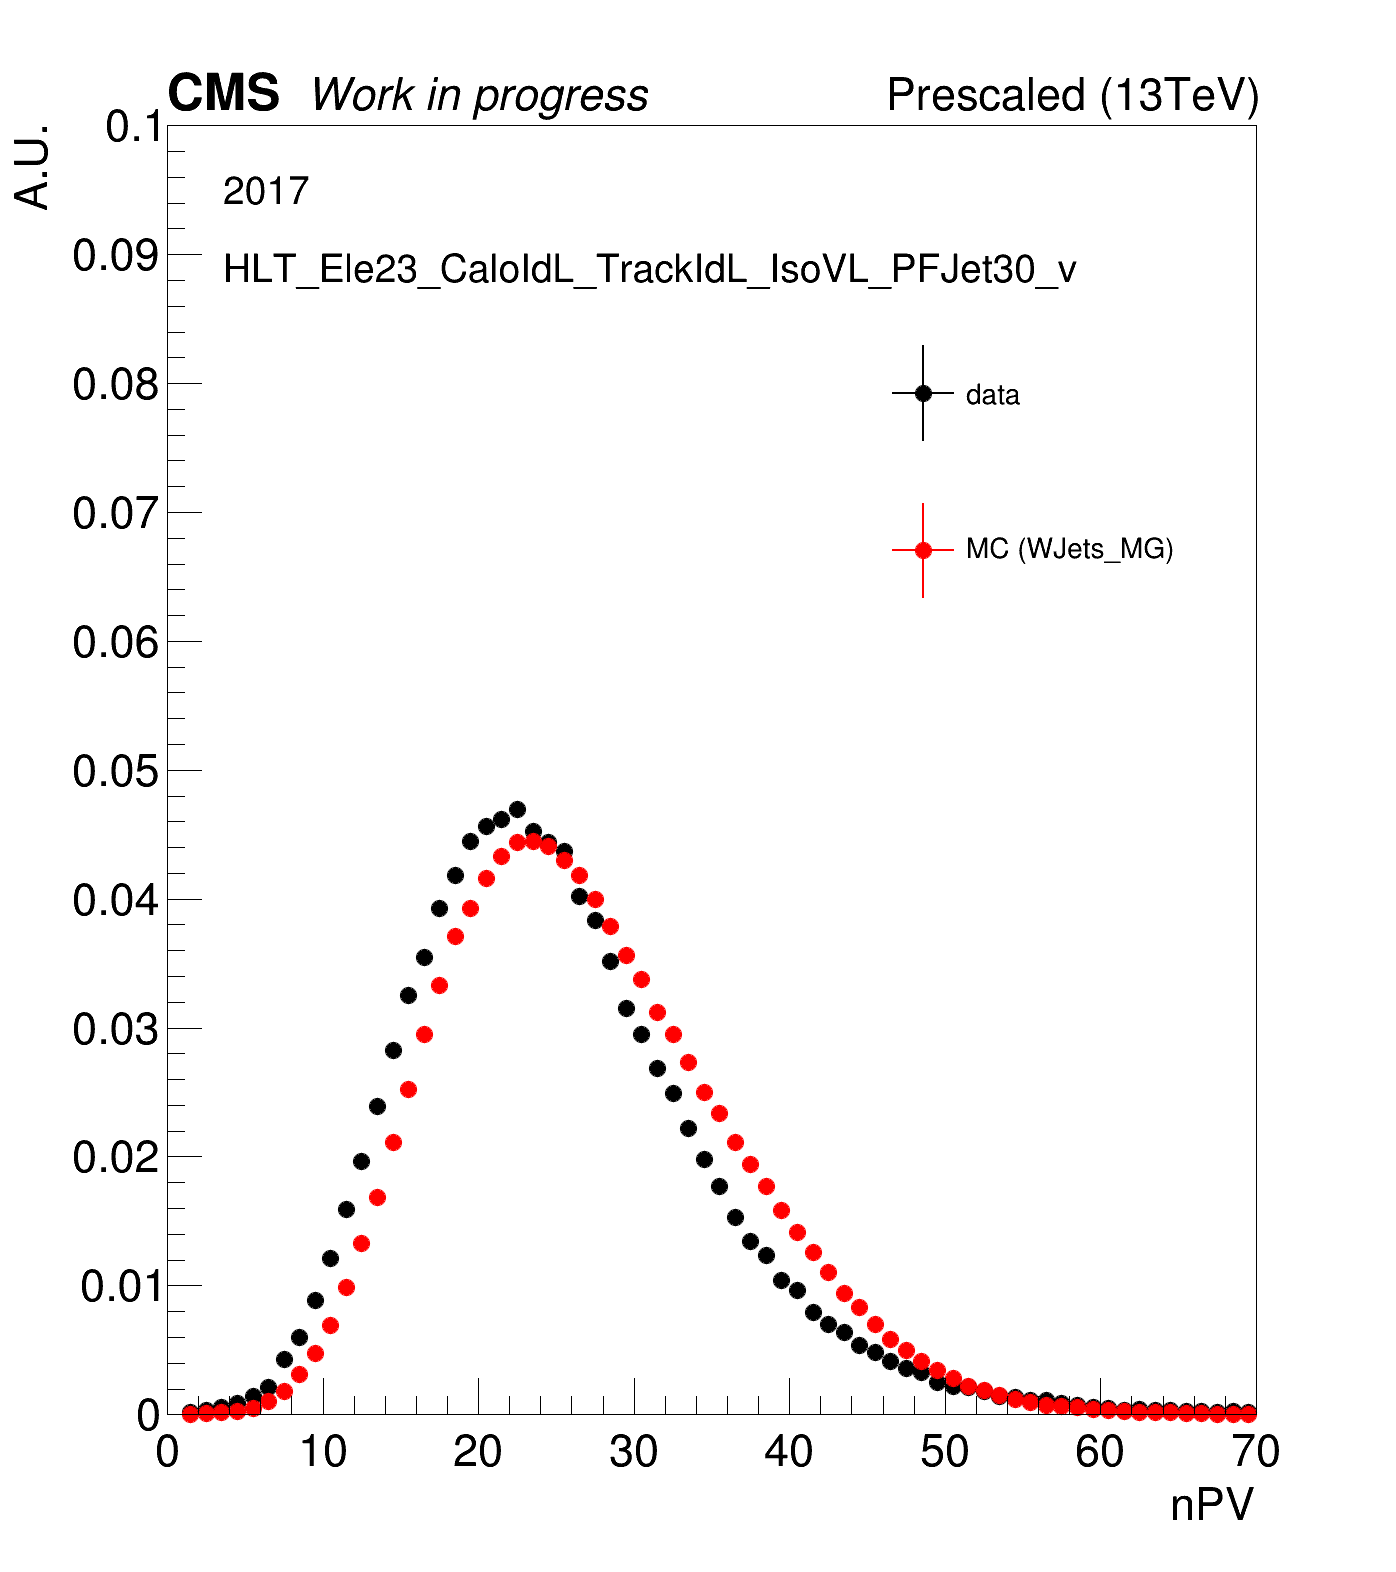

In [38]:
canvas.cd()
h_data.Draw("p&fill")
h_sim.Draw("p&f&same")
legend.Draw("same")
canvas.RedrawAxis()

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.635, 0.93, "Prescaled (13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.12, 0.93, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.22, 0.93, "Work in progress")
setExtraInfoTo(text)
text.DrawLatexNDC(0.16, 0.87, ERA)
text.DrawLatexNDC(0.16, 0.82, trigpathDict[HLTPATH])

canvas.Draw()